In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
X_train = np.loadtxt("X_train.csv",dtype=np.float,delimiter=',')
Y_train = np.loadtxt("Y_train.csv",dtype=np.float,delimiter=',')
X_test = np.loadtxt("X_test.csv",dtype=np.float,delimiter=',')
Y_test = np.loadtxt("Y_test.csv",dtype=np.float,delimiter=',')

In [3]:
from libsvm.svmutil import *

In [20]:
types={'linear':'-t 0','polynomial':'-t 1','radial basis function':'-t 2'}

accuracy=[]
for k,param in types.items():
    model=svm_train(Y_train,X_train,param)
    label,acc,vals=svm_predict(Y_test,X_test,model)
    accuracy.append(acc[0])

i=0
for k,v in types.items():
    print('{} kernel accuracy: {:.2f}%'.format(k,accuracy[i]))
    i+=1

Accuracy = 95.08% (2377/2500) (classification)
Accuracy = 34.68% (867/2500) (classification)
Accuracy = 95.32% (2383/2500) (classification)
linear kernel accuracy: 95.08%
polynomial kernel accuracy: 34.68%
radial basis function kernel accuracy: 95.32%


In [21]:
def grid_search(log2c,log2g,X_train,y_train,X_test,y_test):
    confusion_matrix=np.zeros((len(log2c),len(log2g)))
    for i in range(len(log2c)):
        for j in range(len(log2g)):
            param='-q -t 2 -v 3 -c {} -g {}'.format(2**log2c[i],2**log2g[j])
            acc=svm_train(y_train,X_train,param)
            confusion_matrix[i,j]=acc
    return confusion_matrix


def plot_confusion_matrix(confusion_matrix,log2c,log2g):
    fig, ax = plt.subplots()
    ax.matshow(confusion_matrix, cmap=plt.cm.Greens)
    ax.set_xticklabels([''] + log2g)
    ax.xaxis.set_label_position('top')
    ax.set_yticklabels([''] + log2c)
    for i in range(len(log2c)):
        for j in range(len(log2g)):
            ax.text(i, j, '{:.2f}'.format(confusion_matrix[j, i]), va='center', ha='center')
    ax.set_xlabel('lg(G)')
    ax.set_ylabel('lg(C)')
    plt.show()

Cross Validation Accuracy = 74.5%
Cross Validation Accuracy = 46.4%
Cross Validation Accuracy = 26.78%
Cross Validation Accuracy = 21.62%
Cross Validation Accuracy = 21.04%
Cross Validation Accuracy = 20.4%
Cross Validation Accuracy = 46.16%
Cross Validation Accuracy = 78.78%
Cross Validation Accuracy = 75.14%
Cross Validation Accuracy = 84.36%
Cross Validation Accuracy = 48.14%
Cross Validation Accuracy = 27.42%
Cross Validation Accuracy = 21.64%
Cross Validation Accuracy = 20.52%
Cross Validation Accuracy = 20.38%
Cross Validation Accuracy = 52.66%
Cross Validation Accuracy = 78.92%
Cross Validation Accuracy = 75.38%
Cross Validation Accuracy = 92.98%
Cross Validation Accuracy = 49.06%
Cross Validation Accuracy = 36.48%
Cross Validation Accuracy = 21.68%
Cross Validation Accuracy = 20.86%
Cross Validation Accuracy = 20.32%
Cross Validation Accuracy = 33.12%
Cross Validation Accuracy = 78.98%
Cross Validation Accuracy = 75.38%
Cross Validation Accuracy = 96.5%
Cross Validation Accurac

/home/corrine1106/.conda/envs/py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/home/corrine1106/.conda/envs/py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()


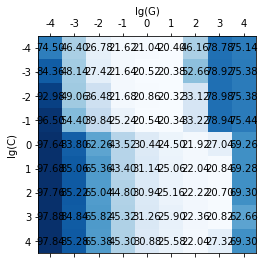

In [13]:
log2c=log2g=[-4,-3,-2,-1,0,1,2,3,4]
confusion_matrix=grid_search(log2c,log2g,X_train,Y_train,X_test,Y_test)

/home/corrine1106/.conda/envs/py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/home/corrine1106/.conda/envs/py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()


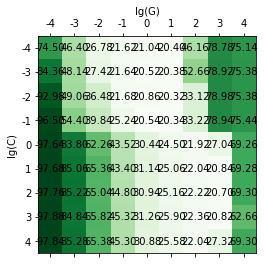

In [22]:
plot_confusion_matrix(confusion_matrix,log2c,log2g)

In [14]:
from scipy.spatial.distance import cdist

In [24]:
def kernel_lr(X, X_, gamma):
    kernel_linear=X @ X_.T
    kernel_RBF=np.exp(-gamma*cdist(X, X_, 'sqeuclidean'))
    kernel=kernel_linear+kernel_RBF
    kernel=np.hstack((np.arange(1,len(X)+1).reshape(-1,1),kernel))
    return kernel

In [25]:
kernel_train=kernel_lr(X_train, X_train, 2**-4)
prob=svm_problem(Y_train,kernel_train,isKernel=True)
param=svm_parameter('-q -t 4 -c 3')
model=svm_train(prob,param)

kernel_test=kernel_lr(X_test, X_train, 2**-4)
p_label,p_acc,p_vals=svm_predict(Y_test,kernel_test,model,'-q')
print('linear kernel + RBF kernel accuracy: {:.2f}%'.format(p_acc[0]))

linear kernel + RBF kernel accuracy: 95.72%
